data from https://www.kaggle.com/harlfoxem/housesalesprediction


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 데이터 준비

In [2]:
!rm -rf kc_house_data.csv
!wget https://github.com/dhrim/deep_learning_data/raw/master/kc_house_data.csv

--2022-01-08 07:18:33--  https://github.com/dhrim/deep_learning_data/raw/master/kc_house_data.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/kc_house_data.csv [following]
--2022-01-08 07:18:34--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.08s   

2022-01-08 07:18:34 (30.6 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



# 파라매터 설정

In [3]:
SEQUENCE_LENGTH = 30
OFFSET = 1
BATCH_SIZE = 32

# 데이터 로딩

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
print(len(df))

21613


In [7]:
print(len(df.id.unique()))

21436


# 결측치 처리

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Date 필드 나누기

## year

In [10]:
df['year'] = df.date.str[:4]
print(df.year)

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: object


In [11]:
print(df.year.max(), df.year.min())

2015 2014


In [12]:
df.year = df.year.astype('category')
df['year_code'] = df.year.cat.codes
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,1


In [13]:
df = pd.get_dummies(df, columns=['year_code'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code_0,year_code_1
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,1,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,1


## month

In [14]:
df['month'] = df.date.str[4:6]
print(df.month)

0        10
1        12
2        02
3        12
4        02
         ..
21608    05
21609    02
21610    06
21611    01
21612    10
Name: month, Length: 21613, dtype: object


In [15]:
df.month = df.month.astype('category')
df['month_code'] = df.month.cat.codes
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code_0,year_code_1,month,month_code
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,1,0,10,9
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,0,12,11
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,1,02,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,1,0,12,11
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,1,02,1


In [16]:
df = pd.get_dummies(df, columns=['month_code'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code_0,year_code_1,month,month_code_0,month_code_1,month_code_2,month_code_3,month_code_4,month_code_5,month_code_6,month_code_7,month_code_8,month_code_9,month_code_10,month_code_11
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,1,0,10,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,0,12,0,0,0,0,0,0,0,0,0,0,0,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,1,02,0,1,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,1,0,12,0,0,0,0,0,0,0,0,0,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,1,02,0,1,0,0,0,0,0,0,0,0,0,0


# 불필요한 컬럼 삭제

In [17]:
df.drop(columns=["id", "date", "year", "month"], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_code_0,year_code_1,month_code_0,month_code_1,month_code_2,month_code_3,month_code_4,month_code_5,month_code_6,month_code_7,month_code_8,month_code_9,month_code_10,month_code_11
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,1,0,1,0,0,0,0,0,0,0,0,0,0


# 이상치 처리

In [18]:
to_be_removed_columns = []

## 로그화

price


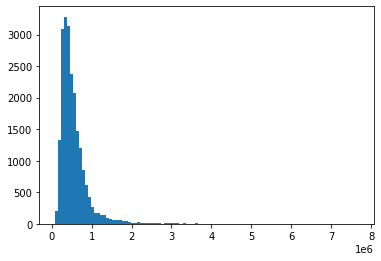

bedrooms


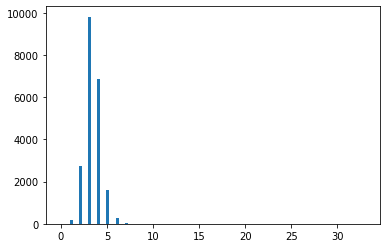

bathrooms


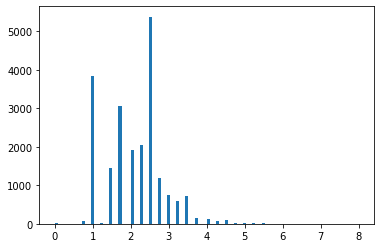

sqft_living


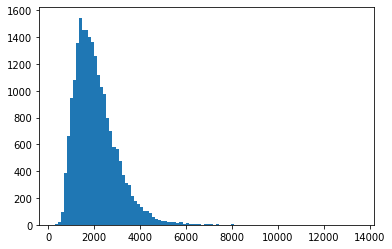

sqft_lot


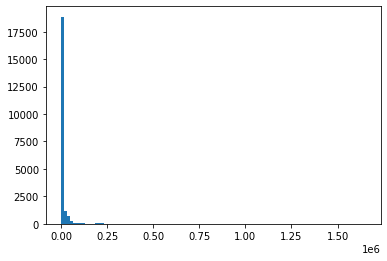

floors


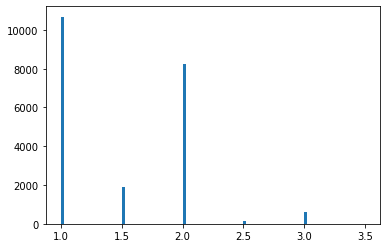

waterfront


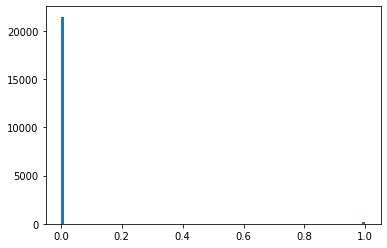

view


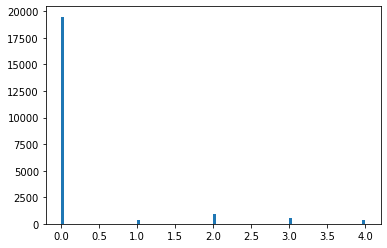

condition


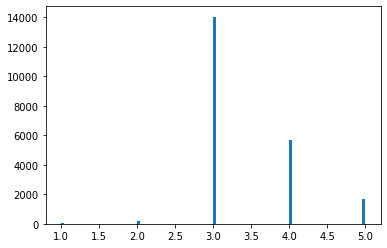

grade


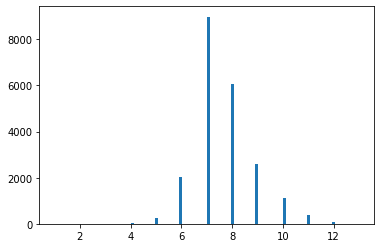

sqft_above


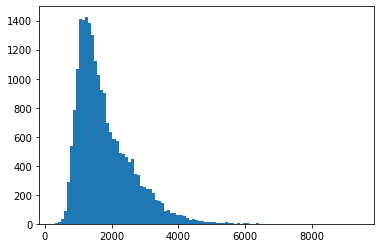

sqft_basement


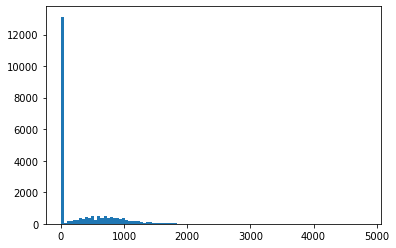

yr_built


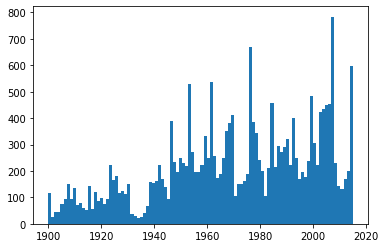

yr_renovated


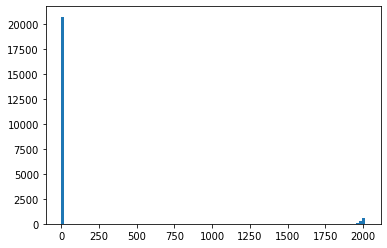

zipcode


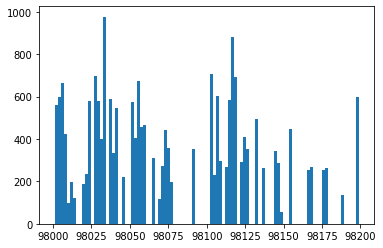

lat


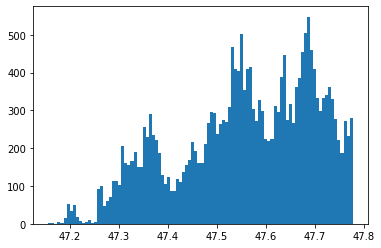

long


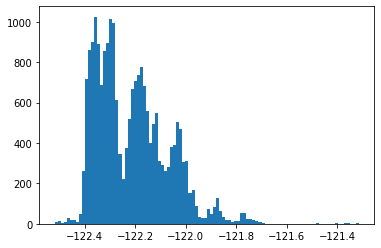

sqft_living15


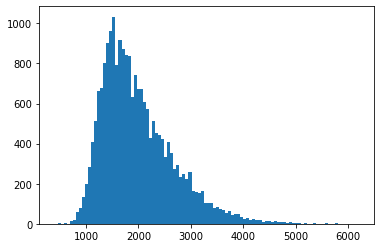

sqft_lot15


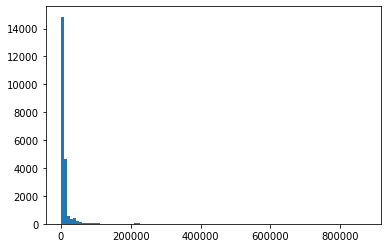

In [19]:
for i in range(len(df.columns)):
    if "_code_" in df.columns[i]: continue
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=100)
    plt.show()


75000.0 7700000.0


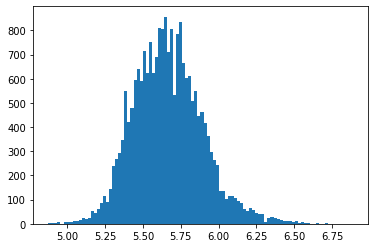

290 13540


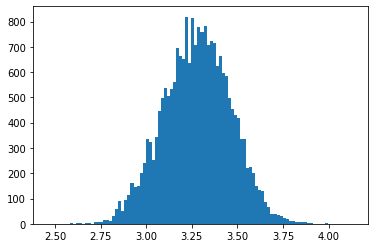

520 1651359


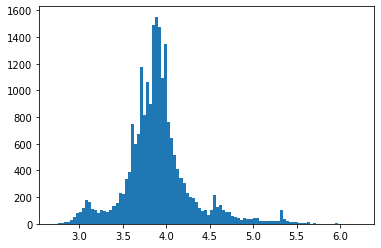

290 9410


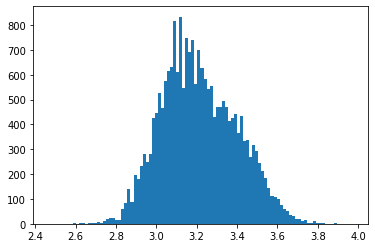

0 4820


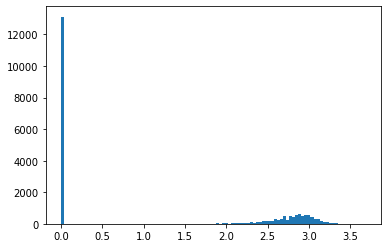

651 871200


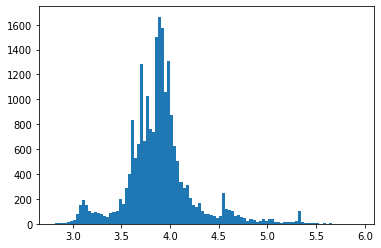

In [20]:
log_target_column = [ 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15' ]

for column_name in log_target_column:
    print(df[column_name].min(), df[column_name].max())
    plt.hist(np.log10(df[column_name]+1), bins=100)
    plt.show()
    df["log_{}".format(column_name)] = np.log10(df[column_name]+1)

to_be_removed_columns.extend(log_target_column)


## 강제 최대값 설정

bedrooms


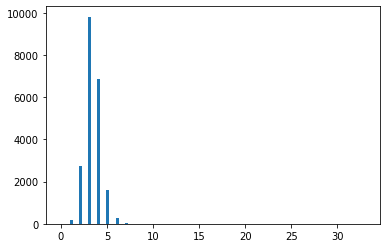

bathrooms


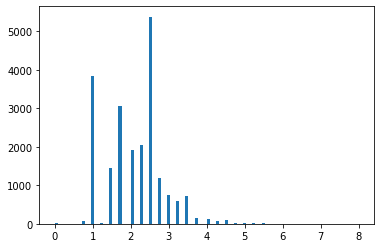

floors


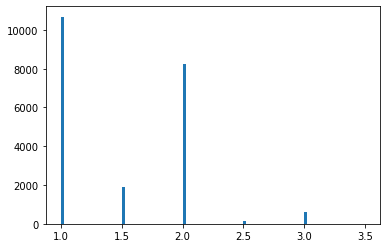

waterfront


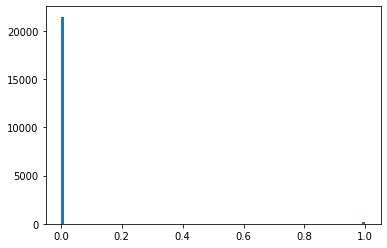

view


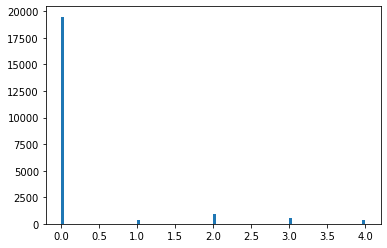

condition


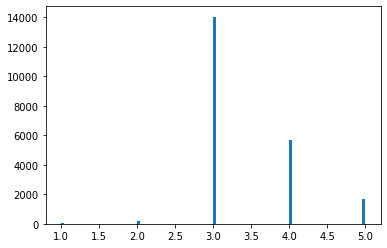

grade


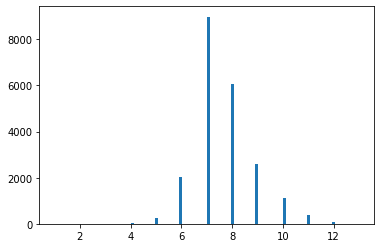

yr_built


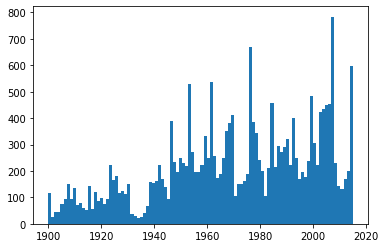

yr_renovated


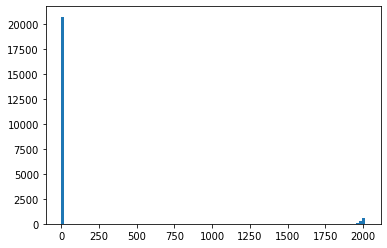

zipcode


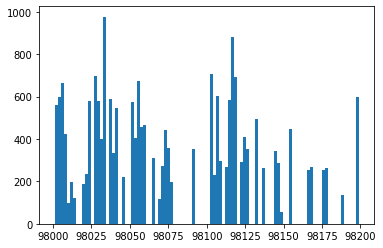

lat


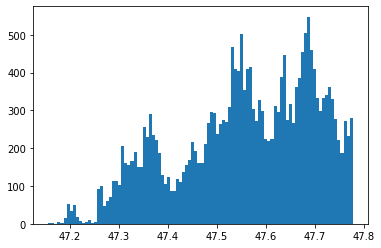

long


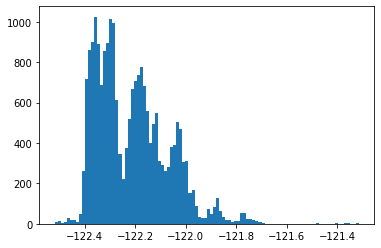

sqft_living15


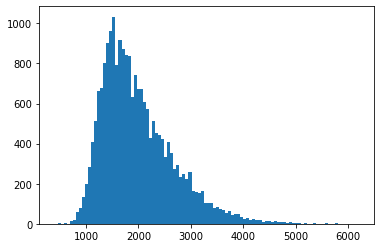

log_price


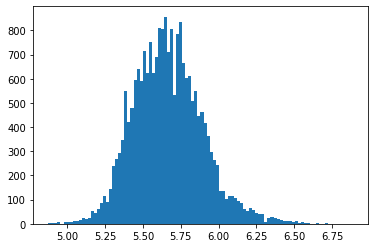

log_sqft_living


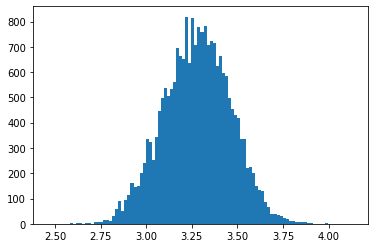

log_sqft_lot


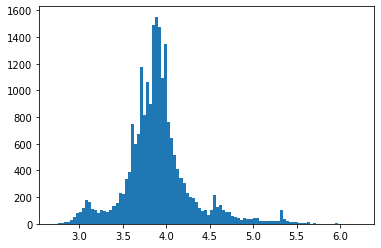

log_sqft_above


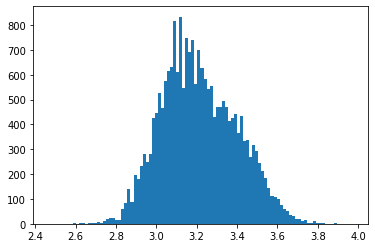

log_sqft_basement


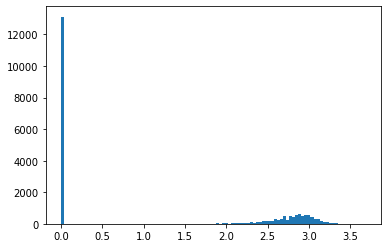

log_sqft_lot15


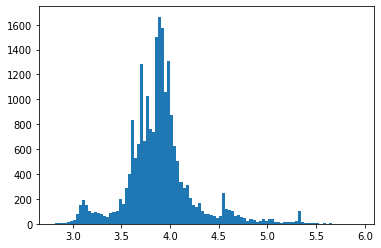

In [21]:
for i in range(len(df.columns)):
    if "_code_" in df.columns[i]: continue
    if df.columns[i] in to_be_removed_columns: continue
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=100)
    plt.show()

max_column_values = {
    'bedrooms':10, 
    'bathrooms':6,
    'long':121.6,
    'sqft_living15':5000,
    'log_sqft_lot':5.5,
    'log_sqft_lot15':5.5
    }

bedrooms 10


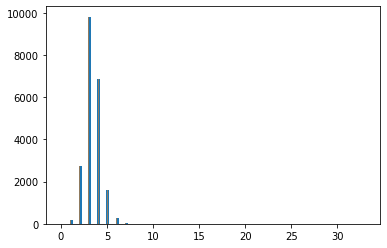

bathrooms 6


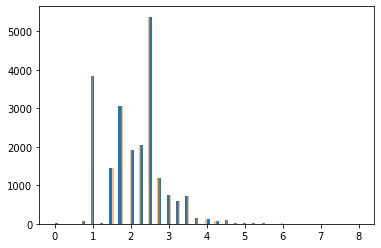

long 121.6


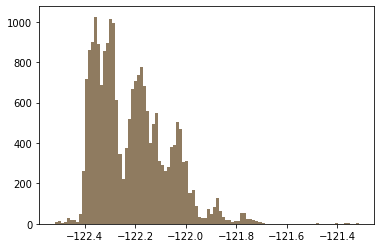

sqft_living15 5000


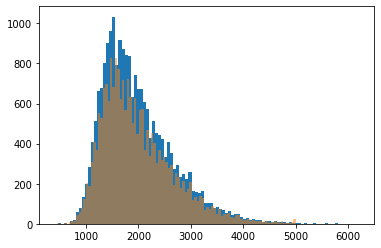

log_sqft_lot 5.5


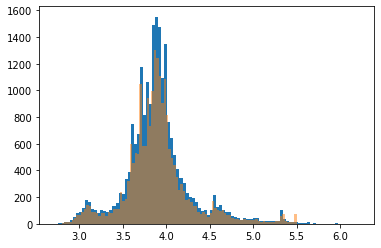

log_sqft_lot15 5.5


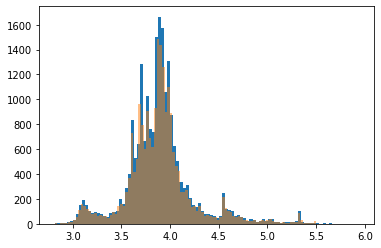

In [22]:
for column_name, max_value in max_column_values.items():
    print(column_name, max_value)
    new_column_name = 'max_limied_{}'.format(column_name)
    df[new_column_name] = df[column_name]
    df.loc[df[new_column_name]>max_value, new_column_name] = max_value

    plt.hist(df[column_name], bins=100)
    plt.hist(df[new_column_name], bins=100, alpha=0.5)
    plt.show()

    to_be_removed_columns.append(column_name)

# 불필요 컬럼 삭제

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      21613 non-null  float64
 1   bedrooms                   21613 non-null  int64  
 2   bathrooms                  21613 non-null  float64
 3   sqft_living                21613 non-null  int64  
 4   sqft_lot                   21613 non-null  int64  
 5   floors                     21613 non-null  float64
 6   waterfront                 21613 non-null  int64  
 7   view                       21613 non-null  int64  
 8   condition                  21613 non-null  int64  
 9   grade                      21613 non-null  int64  
 10  sqft_above                 21613 non-null  int64  
 11  sqft_basement              21613 non-null  int64  
 12  yr_built                   21613 non-null  int64  
 13  yr_renovated               21613 non-null  int

In [24]:
df.drop(columns=to_be_removed_columns, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   floors                     21613 non-null  float64
 1   waterfront                 21613 non-null  int64  
 2   view                       21613 non-null  int64  
 3   condition                  21613 non-null  int64  
 4   grade                      21613 non-null  int64  
 5   yr_built                   21613 non-null  int64  
 6   yr_renovated               21613 non-null  int64  
 7   zipcode                    21613 non-null  int64  
 8   lat                        21613 non-null  float64
 9   year_code_0                21613 non-null  uint8  
 10  year_code_1                21613 non-null  uint8  
 11  month_code_0               21613 non-null  uint8  
 12  month_code_1               21613 non-null  uint8  
 13  month_code_2               21613 non-null  uin

# Shuffle

In [26]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,year_code_0,year_code_1,month_code_0,month_code_1,month_code_2,month_code_3,month_code_4,month_code_5,month_code_6,month_code_7,month_code_8,month_code_9,month_code_10,month_code_11,log_price,log_sqft_living,log_sqft_above,log_sqft_basement,max_limied_bedrooms,max_limied_bathrooms,max_limied_long,max_limied_sqft_living15,max_limied_log_sqft_lot,max_limied_log_sqft_lot15
0,2.0,0,0,3,8,1999,0,98031,47.4088,1,0,0,0,0,0,0,0,0,0,0,0,1,0,5.469823,3.257918,3.257918,0.000000,4,2.5,-122.192,1850,3.687707,3.699317
1,1.0,0,0,3,4,1945,0,98106,47.5181,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5.274160,2.741152,2.741152,0.000000,1,1.0,-122.339,1100,4.213411,3.965719
2,1.0,0,0,3,7,2003,0,98178,47.5065,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.465459,3.453471,3.233250,3.053463,5,3.0,-122.275,2210,3.857332,4.033464
3,2.0,0,0,3,8,1987,0,98034,47.7188,1,0,0,0,0,0,0,0,0,0,0,0,1,0,5.619094,3.255514,3.255514,0.000000,3,2.5,-122.177,1650,3.730217,3.779236
4,1.0,0,0,4,7,1975,0,98038,47.4039,0,1,0,1,0,0,0,0,0,0,0,0,0,0,5.618049,3.344589,3.083144,3.000434,4,2.5,-121.980,2270,5.328398,4.721877


# numpy로 변환

In [27]:
raw_y = df['log_price'].to_numpy()
raw_x = df.drop(columns=['log_price']).to_numpy()

print(raw_x.shape)
print(raw_y.shape)

(21613, 32)
(21613,)


In [28]:
print(raw_x[:2])
maxs = np.max(raw_x, axis=0)
mins = np.min(raw_x, axis=0)
print(maxs)
print(mins)

[[ 2.00000000e+00  0.00000000e+00  0.00000000e+00  3.00000000e+00
   8.00000000e+00  1.99900000e+03  0.00000000e+00  9.80310000e+04
   4.74088000e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  3.25791845e+00
   3.25791845e+00  0.00000000e+00  4.00000000e+00  2.50000000e+00
  -1.22192000e+02  1.85000000e+03  3.68770728e+00  3.69931730e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  3.00000000e+00
   4.00000000e+00  1.94500000e+03  0.00000000e+00  9.81060000e+04
   4.75181000e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  2.74115160e+00
   2.74115160e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.2233

In [29]:
normalized_x = (raw_x - mins) / (maxs - mins)
print(normalized_x[:2])

[[0.4        0.         0.         0.5        0.58333333 0.86086957
  0.         0.15151515 0.40678784 1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.4761036
  0.52593426 0.         0.4        0.41666667 0.27159468 0.31536622
  0.34883685 0.32954255]
 [0.         0.         0.         0.5        0.25       0.39130435
  0.         0.53030303 0.58259611 1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.16624633
  0.18364626 0.         0.1        0.16666667 0.14950166 0.15235818
  0.53772422 0.42873326]]


In [30]:
y_max = np.max(raw_y)
y_min = np.min(raw_y)

normalized_y = (raw_y - y_min) / (y_max - y_min)

In [31]:
def recover_price(v):
    denormalized = v * (y_max - y_min) + y_min
    deloged = np.power(10, denormalized) - 1
    return deloged.astype(np.int)

In [32]:
x = normalized_x
y = normalized_y

In [33]:
print(np.exp(2))

7.38905609893065


# train/test 나누기

In [34]:
i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(17290, 32)
(17290,)
(4323, 32)
(4323,)


# 모델 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
122/122 [==============================] - 1s 4ms/step - loss: 0.0421 - mape: 17933.1270 - val_loss: 0.0104 - val_mape: 23.4443
Epoch 2/500
122/122 [==============================] - 0s 3ms/step - loss: 0.0083 - mape: 18642.8203 - val_loss: 0.0066 - val_mape: 18.3172
Epoch 3/500
122/122 [=====================

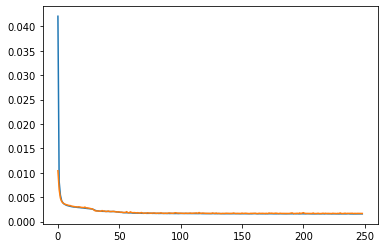

136/136 [==============================] - 0s 2ms/step - loss: 0.0016 - mape: 9.6931
loss= 0.0016294880770146847
mape= 9.69306468963623


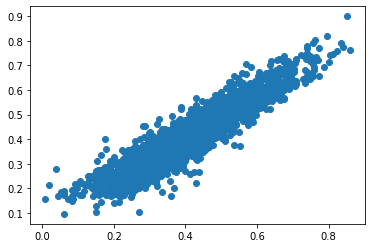

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="Adam", loss="mse", metrics=["mape"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50) 
history = model.fit(train_x, train_y, epochs=500, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

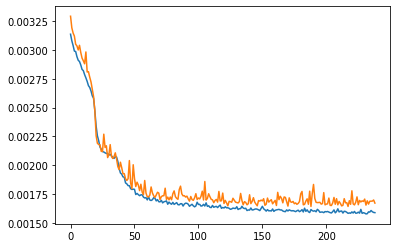

In [36]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.show()

In [37]:
y_ = model.predict(test_x).flatten()

predicted_price = recover_price(y_)
true_price = recover_price(test_y)

print(true_price[:5])
print(predicted_price[:5])

[320000 674599 940000 246950 372500]
[306685 634932 870308 353711 375157]
